# Data loading

In [4]:
import tensorflow as tf
import numpy as np
import scipy
import pandas
import os
import tensorflow.keras.layers as layers
from IPython.display import clear_output 
from keras.applications import VGG19
#importing the libraries
from keras.layers import Dense
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.core import Flatten
from keras.layers import Input
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Model
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.layers import add
from keras.applications import VGG19
import tensorflow as tf
import numpy as np
from keras.optimizers import Adam
import cv2
import keras.backend as K

In [1]:
!wget http://images.cocodataset.org/zips/test2017.zip

--2021-04-10 12:30:28--  http://images.cocodataset.org/zips/test2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.194.65
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.194.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6646970404 (6.2G) [application/zip]
Saving to: ‘test2017.zip’

test2017.zip        100%[===================>]   6.19G  17.3MB/s    in 2m 20s  

2021-04-10 12:32:48 (45.2 MB/s) - ‘test2017.zip’ saved [6646970404/6646970404]



In [2]:
print("processing")
!unzip test2017.zip 

Streaming output truncated to the last 5000 lines.
 extracting: test2017/000000062335.jpg  
 extracting: test2017/000000090590.jpg  
 extracting: test2017/000000509042.jpg  
 extracting: test2017/000000414322.jpg  
 extracting: test2017/000000488051.jpg  
 extracting: test2017/000000320226.jpg  
 extracting: test2017/000000246373.jpg  
 extracting: test2017/000000265541.jpg  
 extracting: test2017/000000517180.jpg  
 extracting: test2017/000000459312.jpg  
 extracting: test2017/000000362160.jpg  
 extracting: test2017/000000477323.jpg  
 extracting: test2017/000000473909.jpg  
 extracting: test2017/000000065340.jpg  
 extracting: test2017/000000128847.jpg  
 extracting: test2017/000000186924.jpg  
 extracting: test2017/000000011692.jpg  
 extracting: test2017/000000489365.jpg  
 extracting: test2017/000000500615.jpg  
 extracting: test2017/000000284429.jpg  
 extracting: test2017/000000430443.jpg  
 extracting: test2017/000000187820.jpg  
 extracting: test2017/000000439726.jpg  
 extra

In [5]:
dir='/content/test2017'
lol = 21
def load_images_from_folder(folder,lol = 50):
    images = []
    i = 0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        i=i+1
        if lol<i:
          break
        if img is not None:
          if i < lol:
            #img = img/255
            images.append(img)
          if i >lol:
            break
    return images        


images = load_images_from_folder(dir)
images = np.array(images)
images.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


(49,)

In [6]:
def high(image):
  high_res = []
  for i in images:
    i = cv2.resize(i,(200,200))
    #i = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    high_res.append(i)
  return np.array(high_res)

def low(image):
  low_res = []
  for i in images:
    i = cv2.resize(i,(50,50))
    #i = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    low_res.append(i)
  return np.array(low_res)

high_images = high(images)
low_images = low(images)
print(high_images.shape)
print(low_images.shape)

(49, 200, 200, 3)
(49, 50, 50, 3)


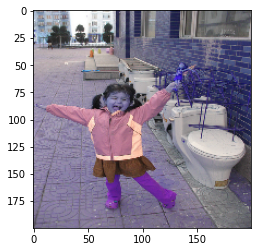

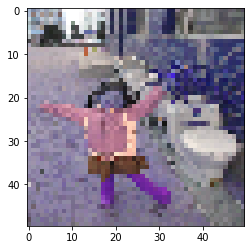

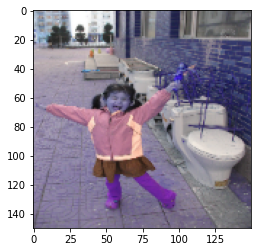

In [7]:
#demo
import matplotlib.pyplot as plt

plt.imshow(high_images[0])
plt.show()
plt.imshow(low_images[0])
plt.show()
plt.imshow(cv2.resize(high_images[0],(150,150)))

x_train_hr = high_images/127.5 -1
x_train_lr = low_images/127.5 - 1

image_shape = (200,200,3)


In [8]:


def hr_images(images):
    images_hr = array(images)
    return images_hr

def lr_images(images_real , downscale):
    
    images = []
    for img in  range(len(images_real)):
        images.append(imresize(images_real[img], [images_real[img].shape[0]//downscale,images_real[img].shape[1]//downscale], interp='bicubic', mode=None))
    images_lr = array(images)
    return images_lr

def preprocess_HR(x):
    return np.divide(x.astype(np.float32), 127.5) - np.ones_like(x,dtype=np.float32)


def deprocess_HR(x):
    input_data = (input_data + 1) * 127.5
    return input_data.astype(np.uint8) 


def preprocess_LR(x):
    return np.divide(x.astype(np.float32), 255.)


def deprocess_LR(x):
    x = np.clip(x*255, 0, 255)
    return x

def normalize(input_data):

    return (input_data.astype(np.float32) - 127.5)/127.5 
    
def denormalize(input_data):
    input_data = (input_data + 1) * 127.5
    return input_data.astype(np.uint8) 

def deprocess_LRS(x):
    x = np.clip(x*255, 0, 255)
    return x.astype(np.uint8)

# Deep Learning

In [9]:

import keras
from keras.layers import Dense
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling2D
from keras.layers.core import Flatten
from keras.layers import Input
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Model
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.layers import add


# Residual block
def res_block_gen(model, kernal_size, filters, strides):
  gen = model  
  model = Conv2D(filters = filters, kernel_size = kernal_size, strides = strides, padding = "same")(model)
  model = BatchNormalization(momentum = 0.5)(model)
  # Using Parametric ReLU
  model = PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=[1,2])(model)
  model = Conv2D(filters = filters, kernel_size = kernal_size, strides = strides, padding = "same")(model)
  model = BatchNormalization(momentum = 0.5)(model)    
  model = add([gen, model])
  
  return model
  
  
def up_sampling_block(model, kernal_size, filters, strides):
  
  # In place of Conv2D and UpSampling2D we can also use Conv2DTranspose (Both are used for Deconvolution)
  # Even we can have our own function for deconvolution (i.e one made in Utils.py)
  #model = Conv2DTranspose(filters = filters, kernel_size = kernal_size, strides = strides, padding = "same")(model)
  model = Conv2D(filters = filters, kernel_size = kernal_size, strides = strides, padding = "same")(model)
  model = UpSampling2D(size = 2)(model)
  model = LeakyReLU(alpha = 0.2)(model)
  return model


def discriminator_block(model, filters, kernel_size, strides):
  model = Conv2D(filters = filters, kernel_size = kernel_size, strides = strides, padding = "same")(model)
  model = BatchNormalization(momentum = 0.5)(model)
  model = LeakyReLU(alpha = 0.2)(model)
  return model

def Generator():
  gen_input = Input(shape = (50,50,3))
  model = Conv2D(filters = 64, kernel_size = 9, strides = 1, padding = "same")(gen_input)
  model = PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=[1,2])(model)
  gen_model = model
    # Using 16 Residual Blocks
  for index in range(16):
      model = res_block_gen(model, 3, 64, 1)
  model = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = "same")(model)
  model = BatchNormalization(momentum = 0.5)(model)
  model = add([gen_model, model])
  
  # Using 2 UpSampling Blocks
  for index in range(2):
      model = up_sampling_block(model, 3, 256, 1)
  model = Conv2D(filters = 3, kernel_size = 9, strides = 1, padding = "same")(model)
  model = Activation('tanh')(model)
  generator_model = Model(inputs = gen_input, outputs = model)    
  return generator_model



# Network Architecture is same as given in Paper https://arxiv.org/pdf/1609.04802.pdf

def Discriminator():
  dis_input = Input(shape = (200,200,3))
  
  model = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = "same")(dis_input)
  model = LeakyReLU(alpha = 0.2)(model)
  
  model = discriminator_block(model, 64, 3, 2)
  model = discriminator_block(model, 128, 3, 1)
  model = discriminator_block(model, 128, 3, 2)
  model = discriminator_block(model, 256, 3, 1)
  model = discriminator_block(model, 256, 3, 2)
  model = discriminator_block(model, 512, 3, 1)
  model = discriminator_block(model, 512, 3, 2)
  
  model = Flatten()(model)
  model = Dense(1024)(model)
  model = LeakyReLU(alpha = 0.2)(model)
  model = Dense(1)(model)
  model = Activation('sigmoid')(model) 
  discriminator_model = Model(inputs = dis_input, outputs = model)
  return discriminator_model


In [10]:

vgg19 = VGG19(include_top=False, weights='imagenet', input_shape=image_shape)
vgg19.trainable = False
for l in vgg19.layers:
    l.trainable = False
loss_model = Model(inputs=vgg19.input, outputs=vgg19.get_layer('block4_conv4').output)
loss_model.trainable = False
def vgg_loss(y_true, y_pred):
  
#  return K.mean(K.square(loss_model(y_true) - loss_model(y_pred)))

  return K.mean(K.square((y_true) - (y_pred)))

def get_gan_network(discriminator, shape, generator, optimizer):
  discriminator.trainable = False
  gan_input = Input(shape=shape)
  x = generator(gan_input)
  gan_output = discriminator(x)
  gan = Model(inputs=gan_input, outputs=[x,gan_output])
  gan.compile(loss=[vgg_loss, "binary_crossentropy"],
              loss_weights=[1., 1e-3],
              optimizer=optimizer)

  return gan

80142336/80134624 [==============================] - 1s 0us/step


--------------- Epoch 1 ---------------
Loss HR , Loss LR, Loss GAN
1.6140997409820557 52.94235610961914 0.38772106170654297


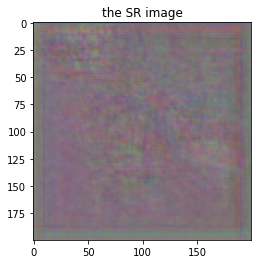

--------------- Epoch 2 ---------------
Loss HR , Loss LR, Loss GAN
5.435003757476807 31.938297271728516 0.2734420597553253


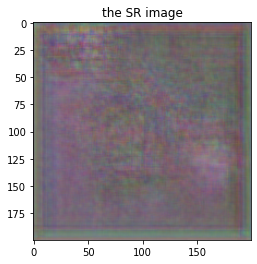

--------------- Epoch 3 ---------------
Loss HR , Loss LR, Loss GAN
2.0950636863708496 3.3624582290649414 0.1848607063293457


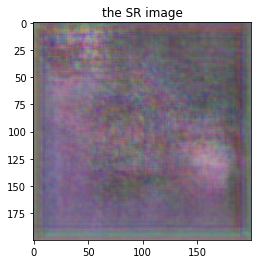

--------------- Epoch 4 ---------------
Loss HR , Loss LR, Loss GAN
1.021061897277832 1.426180124282837 0.15027950704097748


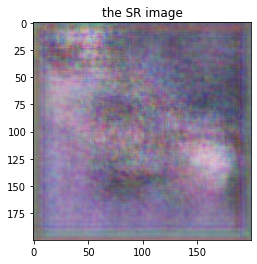

--------------- Epoch 5 ---------------
Loss HR , Loss LR, Loss GAN
7.7022528648376465 2.1529219150543213 0.1494128704071045


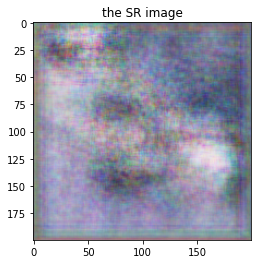

--------------- Epoch 6 ---------------


KeyboardInterrupt: ignored

In [13]:

def plot_generated_images(epoch,generator, examples=3 , dim=(1, 3), figsize=(15, 5)):
    
    rand_nums = np.random.randint(0, x_train_hr.shape[0], size=examples)
    image_batch_hr = denormalize(x_train_hr[rand_nums])
    image_batch_lr = x_train_lr[rand_nums]
    gen_img = generator.predict(image_batch_lr)
    generated_image = denormalize(gen_img)
    image_batch_lr = denormalize(image_batch_lr)
    
    #generated_image = deprocess_HR(generator.predict(image_batch_lr))
    
    plt.figure(figsize=figsize)
    
    plt.subplot(dim[0], dim[1], 1)
    plt.imshow(image_batch_lr[1], interpolation='nearest')
    plt.axis('off')
        
    plt.subplot(dim[0], dim[1], 2)
    plt.imshow(generated_image[1], interpolation='nearest')
    plt.axis('off')
    
    plt.subplot(dim[0], dim[1], 3)
    plt.imshow(image_batch_hr[1], interpolation='nearest')
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('output/gan_generated_image_epoch_%d.png' % epoch)




def train(epochs=1, batch_size=32):

    downscale_factor = 4
    #downscale_factor = 2
    
    batch_count = int(x_train_hr.shape[0] / batch_size)
    shape = (image_shape[0]//downscale_factor, image_shape[1]//downscale_factor, image_shape[2])
    
    generator = Generator()
    discriminator = Discriminator()

    adam = Adam(lr=1E-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    generator.compile(loss=vgg_loss, optimizer=adam)
    discriminator.compile(loss="binary_crossentropy", optimizer=adam)
    
    shape = (image_shape[0]//downscale_factor, image_shape[1]//downscale_factor, 3)
    gan = get_gan_network(discriminator, shape, generator, adam)

    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(batch_count):
            
            rand_nums = np.random.randint(0, x_train_hr.shape[0], size=batch_size)
            
            image_batch_hr = x_train_hr[rand_nums]
            image_batch_lr = x_train_lr[rand_nums]
            generated_images_sr = generator.predict(image_batch_lr)

            real_data_Y = np.ones(batch_size) - np.random.random_sample(batch_size)*0.2
            fake_data_Y = np.random.random_sample(batch_size)*0.2
            
            discriminator.trainable = True
            
            d_loss_real = discriminator.train_on_batch(image_batch_hr, real_data_Y)
            d_loss_fake = discriminator.train_on_batch(generated_images_sr, fake_data_Y)
            #d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)
            
            rand_nums = np.random.randint(0, x_train_hr.shape[0], size=batch_size)
            image_batch_hr = x_train_hr[rand_nums]
            image_batch_lr = x_train_lr[rand_nums]

            gan_Y = np.ones(batch_size) - np.random.random_sample(batch_size)*0.2
            discriminator.trainable = False
            #loss_gan = gan.train_on_batch(image_batch_lr, [image_batch_hr,gan_Y])
            loss_gan = generator.train_on_batch(image_batch_lr, image_batch_hr)
            
        print("Loss HR , Loss LR, Loss GAN")
        print(d_loss_real, d_loss_fake, loss_gan)
        output_gan = generator.predict(np.expand_dims(x_train_lr[0],axis = 0))
        output_gan = denormalize(output_gan)
        plt.imshow(output_gan[0])
        #print(output_gan.shape)
        plt.title("the SR image")
        plt.savefig("the SRgan after")
        plt.show()
        """
        if e == 1 or e % 20 == 0:
            plt.savefig("the SRgan after" %e)
        """
        if e % 200 == 0:       
            clear_output()
            generator.save('./gen_model%d.h5' % e)
            discriminator.save('./dis_model%d.h5' % e)
            gan.save('./gan_model%d.h5' % e)
train(1000)